## Chrun

# Plan
* Explorar los datos
* Cargarlos
* Unir los datos
* Adaptar codigo modelos
* Validar resultados
* Generar pronostico
* Adaptar entregable

* Correlación cruza
* SARIMAX

###  Tener en cuenta
* Seleccion quitar los que tienen poca información

### Pasos a seguir
* Agregar modelos
* Partir entre entremaiento y testing
* Calcular Errores
* Seleccionar mejor metodo por serie y pronosticar

In [146]:
#cargar librerias
import pandas as pd
import numpy as np
from pmdarima.arima import auto_arima
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error,  mean_squared_error
#from fbprophet import Prophet
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt,ExponentialSmoothing
import statsmodels.api as sm

In [101]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(suppress=True)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
TablaMarClient= pd.read_csv(f'CR_Nodos2.csv',sep=';')

In [3]:
TablaMarClient.head(2)

,NODO,MARCACIONES,CLIENTES,CONTACT,MES,ANIO,DIA,FECHA
0,VE2,139,286,48.6,9,2020,1,2020-09-01
1,CQ59,3,15,20.0,9,2020,1,2020-09-01


In [4]:
len(TablaMarClient)

186849

In [5]:
#carga de los datos
TablaChurn=pd.read_csv(f'N3_Tomas_Rojas.csv',sep=';')

In [6]:
len(TablaChurn)

180221

In [7]:
TablaChurn

,E_distrito,Nodo,Fecha,Value,anio,mes,dia,fecha2
0,ACACIAS NORTE,2IA,1/1/2020,-6.0,2020.0,1.0,1.0,2020-01-01
1,ACACIAS NORTE,3IA,1/1/2020,-2.0,2020.0,1.0,1.0,2020-01-01
2,ACACIAS NORTE,AMI,1/1/2020,-8.0,2020.0,1.0,1.0,2020-01-01
3,ACACIAS NORTE,FLS,1/1/2020,-11.0,2020.0,1.0,1.0,2020-01-01
4,ACACIAS NORTE,IAT,1/1/2020,-14.0,2020.0,1.0,1.0,2020-01-01
...,...,...,...,...,...,...,...,...
180216,ZIPAQUIRA DTH,HNEMOC,1/9/2021,1.0,NaN,NaN,NaN,2021-09-01
180217,ZIPAQUIRA DTH,HTABIO,1/9/2021,-2.0,NaN,NaN,NaN,2021-09-01
180218,ZIPAQUIRA DTH,HTENJO,1/9/2021,-15.0,NaN,NaN,NaN,2021-09-01
180219,ZIPAQUIRA DTH,HZIPAQ,1/9/2021,0.0,NaN,NaN,NaN,2021-09-01


In [8]:
TablaFinal=TablaChurn.merge(TablaMarClient,left_on=['Nodo','fecha2'],right_on=['NODO','FECHA'], how='left')
#TablaFinal=TablaChurn.merge(TablaMarClient,left_on='Nodo',right_on='NODO', how='left')

In [9]:
TablaFinal[TablaFinal['NODO'].isnull()].head(10)

,E_distrito,Nodo,Fecha,Value,anio,mes,dia,fecha2,NODO,MARCACIONES,CLIENTES,CONTACT,MES,ANIO,DIA,FECHA
0,ACACIAS NORTE,2IA,1/1/2020,-6.0,2020.0,1.0,1.0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ACACIAS NORTE,3IA,1/1/2020,-2.0,2020.0,1.0,1.0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ACACIAS NORTE,AMI,1/1/2020,-8.0,2020.0,1.0,1.0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ACACIAS NORTE,FLS,1/1/2020,-11.0,2020.0,1.0,1.0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACACIAS NORTE,IAT,1/1/2020,-14.0,2020.0,1.0,1.0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ACACIAS NORTE,IIA,1/1/2020,1.0,2020.0,1.0,1.0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ACACIAS NORTE,INB,1/1/2020,-7.0,2020.0,1.0,1.0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ACACIAS NORTE,IND,1/1/2020,0.0,2020.0,1.0,1.0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ACACIAS NORTE,INY,1/1/2020,-2.0,2020.0,1.0,1.0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,ACACIAS NORTE,LBY,1/1/2020,0.0,2020.0,1.0,1.0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
len(TablaFinal)

180221

In [11]:
# preprocesamiento

In [12]:
TablaFinal.drop(columns=['Fecha','anio','mes','dia','ANIO','MES','DIA','FECHA','NODO'], inplace=True)

In [153]:
TablaFinal.sample(10)

,E_distrito,Nodo,Value,MARCACIONES,CLIENTES,CONTACT,sel
fecha2,,,,,,,
2021-04-01,CEDRITOS,5AL011,-5.000,11.000,94.000,11.700,nodoValido
2021-02-01,CALI SUR DISTRITO 1,A4H,-15.000,90.000,539.000,16.690,nodoValido
2020-01-01,MEDELLIN SURORIENTAL,TR3,0.000,0.000,NaN,NaN,nodoValido
2021-07-01,MEDELLIN SURORIENTAL,BS6,-3.000,17.000,38.000,44.730,nodoValido
2021-02-01,BOLIVAR DISTRITO 4,CPA,-9.000,39.000,159.000,24.520,nodoValido
2021-06-01,METROPOLITANA ITAGUI,BDR,-17.000,129.000,630.000,20.470,nodoValido
2021-04-01,PONTEVEDRA,8A0011,-5.000,19.000,131.000,14.500,nodoValido
2021-09-01,BOLIVAR DISTRITO 3,EV3,-6.000,0.000,NaN,NaN,nodoValido
2021-03-01,VALLE DISTRITO 12,C58,-7.000,23.000,282.000,8.156,nodoValido


In [14]:
# colocar la fecha como index
TablaFinal.set_index('fecha2',inplace=True)

In [15]:
TablaFinal.index=pd.to_datetime(TablaFinal.index)

In [152]:
TablaFinal['MARCACIONES'].fillna(0,inplace=True)

###  separación Entrenamiento y testing

In [71]:
fechaMaxima=max(TablaFinal.index)
fechaMaxima

Timestamp('2021-09-01 00:00:00')

In [72]:
TablaFinal.index.unique()[-4]

Timestamp('2021-06-01 00:00:00')

In [73]:
fechaTrain=TablaFinal.index.unique()[-4]
fechaTest=TablaFinal.index.unique()[-3]

In [74]:
print (fechaTrain,fechaTest)

2021-06-01 00:00:00 2021-07-01 00:00:00


### Seleccion de Nodos
* Nodos con información en los últimos 3 meses
* Nodos con más de 7 registros (por entrenamiento y pruebas)

In [19]:
# Nodos con información en los últimos 3 meses
Resumen=TablaFinal.reset_index()[['fecha2','Nodo']].groupby('Nodo').agg(['max','count'])

In [20]:
Resumen.head(2)

fecha2      
            max count
Nodo                 
01J  2021-09-01     9
01S  2021-09-01    21

In [21]:
Resumen.columns = Resumen.columns.droplevel(0)

In [22]:
Resumen['max'].value_counts()

2021-09-01    18465
2021-01-01       88
2021-03-01       20
2021-04-01       16
2021-05-01       11
2021-02-01        8
2020-04-01        2
2020-09-01        1
2020-08-01        1
Name: max, dtype: int64

In [23]:
Resumen['sel']=np.where(Resumen['max']<=fechaTest,'sinInfoReciente','nodoValido')

In [24]:
Resumen['sel'].value_counts()

nodoValido         18465
sinInfoReciente      147
Name: sel, dtype: int64

In [25]:
# Nodos con más de 7 registros (por entrenamiento y pruebas)

In [26]:
Resumen['count'].value_counts()

9     13600
21     2302
1       862
2       452
3       391
6       249
4       219
7       174
5       171
8        98
14       18
15       17
11       14
13       12
10        9
20        8
16        7
12        4
17        4
18        1
Name: count, dtype: int64

In [27]:
Resumen['sel']=np.where(Resumen['sel']=='nodoValido', np.where(Resumen['count']<7,'sinRegSuf','nodoValido'),Resumen['sel'])

In [28]:
Resumen['sel'].value_counts()

nodoValido         16264
sinRegSuf           2201
sinInfoReciente      147
Name: sel, dtype: int64

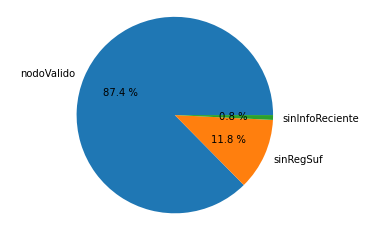

In [29]:
A = Resumen['sel'].value_counts()
indices = A.index
plt.pie(A, labels=indices, autopct="%0.1f %%")
plt.axis("equal")
plt.show()

In [30]:
Resumen.head()

,max,count,sel
Nodo,,,
01J,2021-09-01,9,nodoValido
01S,2021-09-01,21,nodoValido
02J,2021-09-01,9,nodoValido
02S,2021-09-01,21,nodoValido
03J,2021-09-01,9,nodoValido


In [31]:
TablaFinal=TablaFinal.merge(Resumen['sel'], left_on='Nodo', right_index=True,how='left')

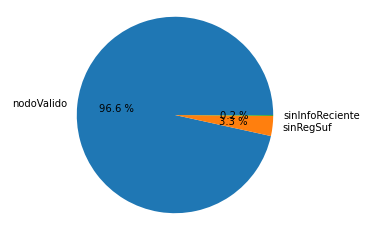

In [32]:
A = TablaFinal['sel'].value_counts()
indices = A.index
plt.pie(A, labels=indices, autopct="%0.1f %%")
plt.axis("equal")
plt.show()

In [33]:
TablaFinal=TablaFinal[TablaFinal['sel']=='nodoValido']

In [155]:
TablaTrain=TablaFinal[TablaFinal.index <= fechaTrain]
TablaTest=TablaFinal[TablaFinal.index >= fechaTest]

### indices

In [219]:
#ind = pd.date_range(TablaFinal.index.max()+ relativedelta(months=1), periods = 4, freq ='M', name='FEC_MUESTRA')[1:]
ind = pd.date_range(TablaTrain.index.max(), periods = 4, freq ='MS', name='FECHA')[1:]
ind

DatetimeIndex(['2021-07-01', '2021-08-01', '2021-09-01'], dtype='datetime64[ns]', name='FECHA', freq='MS')

In [200]:
TablaFinal.index.max()

Timestamp('2021-09-01 00:00:00')

In [158]:
grouped.get_group('01J') 

,Nodo,Value,MARCACIONES
fecha2,,,
2021-01-01,01J,0.000,5.000
2021-02-01,01J,0.000,9.000
2021-03-01,01J,0.000,3.000
2021-04-01,01J,0.000,0.000
2021-05-01,01J,-1.000,0.000
2021-06-01,01J,-2.000,6.000


#### Predicciones

In [157]:
final = pd.DataFrame()
finalErrores = {}
grouped =TablaTrain[['Nodo','Value','MARCACIONES']].groupby('Nodo')
groupedTest =TablaTest[['Nodo','Value']].groupby('Nodo')

In [165]:
metodos=['ARIMA','ES','HOLT','ES_ajTend']

In [217]:
dicMetodos={}

In [252]:
i=0
for g in grouped.groups:
    if i>30*len(metodos):
        continue
    if i/len(metodos)%10==0:
        print(i/len(metodos))    
    dicNodo={} 
    dicAuxMetodo={}
    group = grouped.get_group(g) 
    groupTest = groupedTest.get_group(g) 
    for metodo in metodos:
        if metodo== 'ARIMA':
            model=auto_arima(group['Value'],trace=False)
            model.fit(group['Value'])  
            forecast=pd.DataFrame(model.predict(n_periods = 3),index=ind)
        elif metodo== 'ES':
            model = SimpleExpSmoothing(group['Value'])
            model=model.fit(smoothing_level=.5)
            forecast=pd.DataFrame(model.forecast(3),index=ind)
        elif metodo== 'HOLT':
            model = Holt(group['Value']) 
            model = model.fit(optimized=True)
            forecast=pd.DataFrame(model.forecast(3),index=ind)
        elif metodo== 'ES_ajTend':
            model = ExponentialSmoothing(group['Value'],trend='add', seasonal=None, damped=True)
            model= model.fit()
            forecast=pd.DataFrame(model.forecast(3),index=ind)
        elif metodo=='ARIMAX':
            #model=sm.tsa.statespace.SARIMAX(group['Value'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
            model=sm.tsa.statespace.SARIMAX(group['Value'],order=(1, 1, 1),seasonal_order=(1,1,1,12),exog=group['MARCACIONES'])
            model=model.fit()            
            forecast=pd.DataFrame(results.predict(n_periods = 3,dynamic=True),index=ind)
        
        #guardar modelo
        dicAuxMetodo[metodo]=model
        #print(g)
        #print(metodo)
        #print(forecast)
        forecast.columns = ['pred']  
        forecast['Nodo']=g
        forecast['Metodo']=metodo
        if i==0:
            final=forecast
        else:
            final=final.append(forecast)      

        # Errores
        ## Medicion varios errores, seleccionar el que mejor se ajuste
        RMSE=mean_squared_error(groupTest['Value'],forecast['pred'], squared=False)
        MAPE=mean_absolute_percentage_error(groupTest['Value'],forecast['pred'])    
        dicNodo[metodo]=RMSE  
        i=i+1
    finalErrores[g]=dicNodo
    dicMetodos[g]=dicAuxMetodo

0.0
10.0
20.0
30.0


In [221]:
dicMetodos

{'01J': {'ARIMA': ARIMA(order=(2, 0, 0), scoring_args={}, suppress_warnings=True),
  'ES': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x181f437c880>,
  'HOLT': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x181f43a6e20>,
  'ES_ajTend': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x181f43a6220>},
 '01S': {'ARIMA': ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
        with_intercept=False),
  'ES': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x181f4391f40>,
  'HOLT': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x181f43a6580>,
  'ES_ajTend': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x181f77de880>},
 '02J': {'ARIMA': ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True,
        with_intercept=False),
  'ES': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x181f43a67c0>,
  'HOLT': <statsmodels.tsa.holtwinters.re

In [253]:
final

,pred,Nodo,Metodo
FECHA,,,
2021-07-01,-2.290,01J,ARIMA
2021-08-01,-1.927,01J,ARIMA
2021-09-01,-1.211,01J,ARIMA
2021-07-01,-1.251,01J,ES
2021-08-01,-1.251,01J,ES
2021-09-01,-1.251,01J,ES
2021-07-01,-3.000,01J,HOLT
2021-08-01,-4.000,01J,HOLT
2021-09-01,-5.000,01J,HOLT


In [206]:
final[final['pred'].isnull()]

,pred,Nodo,Metodo
FECHA,,,


In [145]:
##### No tiene nullos

### Selección mejor método por Nodo

In [226]:
finalErrores

{'01J': {'ARIMA': 1.7609702314252422,
  'ES': 1.2499151844992582,
  'HOLT': 2.708012829058409,
  'ES_ajTend': 2.693306097364563},
 '01S': {'ARIMA': 5.163977794943222,
  'ES': 3.884402465542031,
  'HOLT': 4.765137619184128,
  'ES_ajTend': 4.699365432661731},
 '02J': {'ARIMA': 1.7320508075688772,
  'ES': 1.7320508075688772,
  'HOLT': 1.7320508075688772,
  'ES_ajTend': 1.7320508075688772},
 '02S': {'ARIMA': 5.282197658434962,
  'ES': 5.683077595224782,
  'HOLT': 4.807232662975083,
  'ES_ajTend': 5.413368623579654},
 '03J': {'ARIMA': 1.771690968789108,
  'ES': 1.7275610710933966,
  'HOLT': 10.197454008015974,
  'ES_ajTend': 7.463851820289817},
 '04J': {'ARIMA': 1.7320508075688772,
  'ES': 1.4685036049739608,
  'HOLT': 2.3004661601771645,
  'ES_ajTend': 2.270074927708444},
 '05J': {'ARIMA': 7.303952886169051,
  'ES': 5.994388776396382,
  'HOLT': 11.129572319798879,
  'ES_ajTend': 11.041095030459783},
 '06J': {'ARIMA': 2.362907813126305,
  'ES': 1.3442902053229226,
  'HOLT': 1.15470131978872

In [208]:
metodos

['ARIMA', 'ES', 'HOLT', 'ES_ajTend']

In [227]:
dfFinalErrores=pd.DataFrame.from_dict(finalErrores,orient='index')
dfFinalErrores

,ARIMA,ES,HOLT,ES_ajTend
01J,1.761,1.250,2.708,2.693
01S,5.164,3.884,4.765,4.699
02J,1.732,1.732,1.732,1.732
02S,5.282,5.683,4.807,5.413
03J,1.772,1.728,10.197,7.464
04J,1.732,1.469,2.300,2.270
05J,7.304,5.994,11.130,11.041
06J,2.363,1.344,1.155,0.954
07J,0.705,1.248,1.514,1.433
09J,2.082,2.072,1.903,1.896


In [228]:
minError=list(dfFinalErrores.min(axis=1).values)
minError

[1.2499151844992582,
 3.884402465542031,
 1.7320508075688772,
 4.807232662975083,
 1.7275610710933966,
 1.4685036049739608,
 5.994388776396382,
 0.9541010323927027,
 0.7054387296059219,
 1.8956341143783109,
 4.534915169489566,
 2.6454934264945695,
 1.2408037034042232,
 2.273954674732545,
 1.0371670517799487,
 5.315072906367322,
 2.0816659994661326,
 5.870484224833042,
 1.7716909687891085,
 0.0,
 1.2746475914184674,
 4.110006593061785,
 3.220735968215573,
 5.32290647422377,
 1.7716909687891094,
 4.5246239868327445,
 5.123475382979798,
 2.753785273643052,
 0.0,
 2.1666666663984833,
 6.2738434082395695]

In [229]:
modeloSeleccionado=[np.nan]*len(dfFinalErrores)
i=0
for indx,row in dfFinalErrores.iterrows():
    auxRow=list(row.values)
    auxInd=auxRow.index(minError[i])
    modeloSeleccionado[i]=metodos[auxInd]
    #print(auxRow)
    i=i+1

In [230]:
modeloSeleccionado

['ES',
 'ES',
 'ARIMA',
 'HOLT',
 'ES',
 'ES',
 'ES',
 'ES_ajTend',
 'ARIMA',
 'ES_ajTend',
 'ES',
 'ES_ajTend',
 'ARIMA',
 'ES',
 'ES',
 'ARIMA',
 'ARIMA',
 'ES',
 'ARIMA',
 'ARIMA',
 'ES',
 'ES',
 'ES',
 'ARIMA',
 'ARIMA',
 'ARIMA',
 'ARIMA',
 'ARIMA',
 'ARIMA',
 'ARIMA',
 'ARIMA']

In [231]:
dfFinalErrores['seleccion']=modeloSeleccionado

In [232]:
dfFinalErrores

,ARIMA,ES,HOLT,ES_ajTend,seleccion
01J,1.761,1.250,2.708,2.693,ES
01S,5.164,3.884,4.765,4.699,ES
02J,1.732,1.732,1.732,1.732,ARIMA
02S,5.282,5.683,4.807,5.413,HOLT
03J,1.772,1.728,10.197,7.464,ES
04J,1.732,1.469,2.300,2.270,ES
05J,7.304,5.994,11.130,11.041,ES
06J,2.363,1.344,1.155,0.954,ES_ajTend
07J,0.705,1.248,1.514,1.433,ARIMA
09J,2.082,2.072,1.903,1.896,ES_ajTend


### Predicción Final

In [244]:
ind_P = pd.date_range(fechaMaxima, periods = 4, freq ='MS', name='FECHA')[1:]
ind_P

DatetimeIndex(['2021-10-01', '2021-11-01', '2021-12-01'], dtype='datetime64[ns]', name='FECHA', freq='MS')

In [234]:
dicMetodos

{'01J': {'ARIMA': ARIMA(order=(2, 0, 0), scoring_args={}, suppress_warnings=True),
  'ES': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x181f6385970>,
  'HOLT': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x181f6385bb0>,
  'ES_ajTend': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x181f6384d90>},
 '01S': {'ARIMA': ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
        with_intercept=False),
  'ES': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x181f43a6fd0>,
  'HOLT': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x181f52bea60>,
  'ES_ajTend': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x181f6683cd0>},
 '02J': {'ARIMA': ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True,
        with_intercept=False),
  'ES': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x181f6683f40>,
  'HOLT': <statsmodels.tsa.holtwinters.re

In [245]:
finalPrediccionesFuturas = pd.DataFrame()
groupedPred =TablaFinal[['Nodo','Value','MARCACIONES']].groupby('Nodo')

In [255]:
i=0
for g in groupedPred.groups:
    if i>30:
        continue
    if i%10==0:
        print(i)    
    group = groupedPred.get_group(g)        
    mejorMetodo=dfFinalErrores.loc[g,'seleccion']
    #print(mejorMetodo)
    #metodo=dicMetodos[g][mejorMetodo]
    #forecast=model.predict(group['Value'])
    if mejorMetodo== 'ARIMA':
        model=auto_arima(group['Value'],trace=False)
        model.fit(group['Value'])  
        forecast=pd.DataFrame(model.predict(n_periods = 3),index=ind_P)
    elif mejorMetodo== 'ES':
        model = SimpleExpSmoothing(group['Value'])
        model=model.fit(smoothing_level=.5)
        forecast=pd.DataFrame(model.forecast(3),index=ind_P)
    elif mejorMetodo== 'HOLT':
        model = Holt(group['Value']) 
        model = model.fit(optimized=True)
        forecast=pd.DataFrame(model.forecast(3),index=ind_P)
    elif mejorMetodo== 'ES_ajTend':
        model = ExponentialSmoothing(group['Value'],trend='add', seasonal=None, damped=True)
        model= model.fit()
        forecast=pd.DataFrame(model.forecast(3),index=ind_P)
    elif mejorMetodo=='ARIMAX':        
        model=sm.tsa.statespace.SARIMAX(group['Value'],order=(1, 1, 1),seasonal_order=(1,1,1,12),exog=group['MARCACIONES'])
        model=model.fit()            
        forecast=pd.DataFrame(results.predict(n_periods = 3,dynamic=True),index=ind_P)
    
    forecast.columns = ['pred'] 
    forecast['Nodo']=g
    forecast['Metodo']=mejorMetodo

    if i==0:
        finalPrediccionesFuturas=forecast
    else:
        finalPrediccionesFuturas=finalPrediccionesFuturas.append(forecast) 
    i=i+1
        

0
10
20
30


In [256]:
finalPrediccionesFuturas

,pred,Nodo,Metodo
FECHA,,,
2021-10-01,-1.906,01J,ES
2021-11-01,-1.906,01J,ES
2021-12-01,-1.906,01J,ES
2021-10-01,-2.763,01S,ES
2021-11-01,-2.763,01S,ES
2021-12-01,-2.763,01S,ES
2021-10-01,0.000,02J,ARIMA
2021-11-01,0.000,02J,ARIMA
2021-12-01,0.000,02J,ARIMA


## Visualizar Resultado Nodo

In [291]:
def visualNodo(nodo):
    print(finalErrores[nodo])
    dfNodo_real=TablaFinal[TablaFinal['Nodo']==nodo][['Value']]
    dfNodo=final[final['Nodo']==nodo]
    dfNodo= pd.pivot_table(dfNodo.reset_index(), index='FECHA', columns='Metodo', values='pred')
    #dfNodo_real.merge(dfNodo,left_index=True, right_index=True, how='left').plot()
    dfNodo_real=dfNodo_real.merge(dfNodo,left_index=True, right_index=True, how='left')
    dfPrediciciones=finalPrediccionesFuturas[finalPrediccionesFuturas['Nodo']==nodo]
    metodoSel=dfPrediciciones['Metodo'].unique()[0]
    dfPrediciciones.rename(columns={'pred':'pred_'+metodoSel},inplace=True)
    dfNodo_real.merge(dfPrediciciones[['pred_'+metodoSel]],left_index=True, right_index=True,how='outer').plot()

{'ARIMA': 1.7320508075688772, 'ES': 1.7320508075688772, 'HOLT': 1.7320508075688772, 'ES_ajTend': 1.7320508075688772}


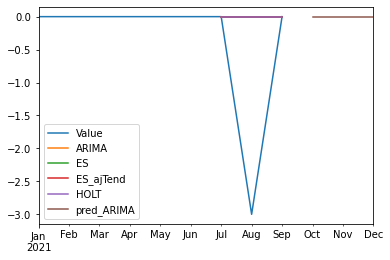

In [294]:
visualNodo('02J')

In [260]:
nodo='06J'

In [261]:
finalErrores[nodo]

{'ARIMA': 2.362907813126305,
 'ES': 1.3442902053229226,
 'HOLT': 1.1547013197887268,
 'ES_ajTend': 0.9541010323927027}

In [262]:
dfNodo_real=TablaFinal[TablaFinal['Nodo']==nodo][['Value']]

In [263]:
dfNodo_real

,Value
fecha2,
2021-01-01,0.000
2021-02-01,-3.000
2021-03-01,-6.000
2021-04-01,-7.000
2021-05-01,-1.000
2021-06-01,0.000
2021-07-01,0.000
2021-08-01,-2.000
2021-09-01,0.000


In [264]:
dfNodo=final[final['Nodo']==nodo]

In [265]:
dfNodo

,pred,Nodo,Metodo
FECHA,,,
2021-07-01,-2.833,06J,ARIMA
2021-08-01,-2.833,06J,ARIMA
2021-09-01,-2.833,06J,ARIMA
2021-07-01,-1.625,06J,ES
2021-08-01,-1.625,06J,ES
2021-09-01,-1.625,06J,ES
2021-07-01,0.000,06J,HOLT
2021-08-01,0.000,06J,HOLT
2021-09-01,0.000,06J,HOLT


In [267]:
dfNodo= pd.pivot_table(dfNodo.reset_index(), index='FECHA', columns='Metodo', values='pred')

In [268]:
dfNodo

Metodo,ARIMA,ES,ES_ajTend,HOLT
FECHA,,,,
2021-07-01,-2.833,-1.625,-0.338,0.000
2021-08-01,-2.833,-1.625,-0.609,0.000
2021-09-01,-2.833,-1.625,-0.825,0.000


In [269]:
dfNodo_real.merge(dfNodo,left_index=True, right_index=True, how='left')

,Value,ARIMA,ES,ES_ajTend,HOLT
fecha2,,,,,
2021-01-01,0.000,NaN,NaN,NaN,NaN
2021-02-01,-3.000,NaN,NaN,NaN,NaN
2021-03-01,-6.000,NaN,NaN,NaN,NaN
2021-04-01,-7.000,NaN,NaN,NaN,NaN
2021-05-01,-1.000,NaN,NaN,NaN,NaN
2021-06-01,0.000,NaN,NaN,NaN,NaN
2021-07-01,0.000,-2.833,-1.625,-0.338,0.000
2021-08-01,-2.000,-2.833,-1.625,-0.609,0.000
2021-09-01,0.000,-2.833,-1.625,-0.825,0.000


In [273]:
df1=dfNodo_real.merge(dfNodo,left_index=True, right_index=True, how='left')

In [275]:
df1.merge(finalPrediccionesFuturas[finalPrediccionesFuturas['Nodo']==nodo]['pred'],left_index=True, right_index=True,how='outer')

,Value,ARIMA,ES,ES_ajTend,HOLT,pred
2021-01-01,0.000,NaN,NaN,NaN,NaN,NaN
2021-02-01,-3.000,NaN,NaN,NaN,NaN,NaN
2021-03-01,-6.000,NaN,NaN,NaN,NaN,NaN
2021-04-01,-7.000,NaN,NaN,NaN,NaN,NaN
2021-05-01,-1.000,NaN,NaN,NaN,NaN,NaN
2021-06-01,0.000,NaN,NaN,NaN,NaN,NaN
2021-07-01,0.000,-2.833,-1.625,-0.338,0.000,NaN
2021-08-01,-2.000,-2.833,-1.625,-0.609,0.000,NaN
2021-09-01,0.000,-2.833,-1.625,-0.825,0.000,NaN
2021-10-01,NaN,NaN,NaN,NaN,NaN,-0.166


<AxesSubplot:xlabel='fecha2'>

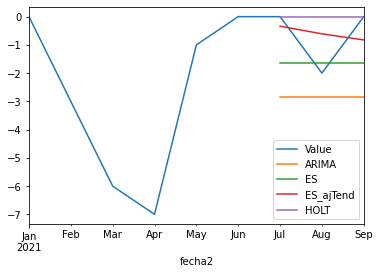

In [270]:
dfNodo_real.merge(dfNodo,left_index=True, right_index=True, how='left').plot()